In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from nltk.corpus import stopwords
from nltk import FreqDist

In [2]:
DATASET_PATH = 'NLP_engineer_assigment_sentiment'

df_reviews_train = pd.read_csv(f'{DATASET_PATH}/train_data_restaurant.tsv', sep='\t', header=None, names=['review', 'sentiment'])
print(df_reviews_train.shape)
print(df_reviews_train.head())

df_reviews_test = pd.read_csv(f'{DATASET_PATH}/test_data_restaurant.tsv', sep='\t', header=None, names=['review', 'sentiment'])
print(df_reviews_test.shape)
print(df_reviews_test.head())

(1780, 2)
                                              review sentiment
0  Saya makan di sini dengan menggunakan voucher ...  negative
1  Mas indosat buat main game enemy has been slai...  negative
2  Trus sy percuma dong update no hp terbaru ke c...  negative
3  jika kita pilih dia maka akan ada lebih dari 3...  negative
4  Dikarenakan adik saya suka dengan restoran ini...  negative
(185, 2)
                                              review sentiment
0  Tempatnya sih menarik, mudah dijangkau dari se...  negative
1  lokasi strategis penasaran karena daerah situ ...  negative
2  Sesuai namanya, restoran ini unik dalam menyaj...  negative
3  Saya datang ketika petang dan hujan deras temp...  negative
4  Kalao mau ke sana jangan pas malem sih, soalny...  negative


# Analyzing Dataset

In [ ]:
i = 0
for review in df_reviews_train['review']:
    print(f'{i}.')
    print(review, end='\n\n')
    i += 1

In [4]:
df_reviews_train['sentiment'].describe()

count         1780
unique           2
top       positive
freq          1200
Name: sentiment, dtype: object

In [5]:
merged = ''
for review in df_reviews_train['review']:
    merged += review

freq_dist = FreqDist(merged.split())
freq_dist.most_common(100)

[('dan', 1856),
 ('yang', 1590),
 ('di', 1496),
 ('saya', 849),
 ('dengan', 830),
 ('untuk', 667),
 ('tidak', 648),
 ('makan', 594),
 ('ini', 571),
 ('juga', 523),
 ('makanan', 516),
 ('ada', 504),
 ('yg', 491),
 ('tempat', 466),
 ('nya', 432),
 ('sangat', 427),
 ('enak', 421),
 ('ke', 405),
 ('cukup', 402),
 ('dari', 343),
 ('menu', 318),
 ('harga', 297),
 ('kami', 292),
 ('karena', 292),
 ('tapi', 285),
 ('rasa', 283),
 ('banyak', 262),
 ('bisa', 260),
 ('kurang', 222),
 ('rasanya', 213),
 ('adalah', 191),
 ('biasa', 189),
 ('terlalu', 186),
 ('buat', 186),
 ('restoran', 185),
 ('sudah', 177),
 ('lebih', 177),
 ('ayam', 171),
 ('satu', 164),
 ('jadi', 163),
 ('seperti', 163),
 ('atau', 161),
 ('ga', 156),
 ('lumayan', 154),
 ('datang', 152),
 ('enak.', 150),
 ('enak,', 149),
 ('agak', 144),
 ('goreng', 144),
 ('itu', 143),
 ('kita', 142),
 ('sini', 139),
 ('sama', 137),
 ('pun', 135),
 ('hanya', 134),
 ('nasi', 133),
 ('suka', 127),
 ('Saya', 126),
 ('masih', 125),
 ('saat', 124),
 (

In [6]:
def get_review_length(text):
    return len(text.split())
df_length = df_reviews_train['review'].apply(get_review_length)
df_length.describe()

count    1780.000000
mean       38.351124
std        15.688894
min         8.000000
25%        24.000000
50%        36.000000
75%        54.000000
max        82.000000
Name: review, dtype: float64

# Cleaning and Normalization

In [7]:
import string

def remove_punctuations(text):
    table = str.maketrans('', '', string.punctuation)
    filtered = [w.translate(table) for w in text.split()]
    return ' '.join(filtered)

def remove_numbers(text):
    table = str.maketrans('', '', '0123456789')
    filtered = [w.translate(table) for w in text.split()]
    return ' '.join(filtered)

norm_dict = {
    'sy':'saya',
    'tp':'tapi',
    'yg':'yang',
    'pkl':'pukul',
    'tlg':'tolong',
    'trims':'terima kasih',
    'g':'gak',
    'ga':'gak',
    'dgn':'dengan',
    'krn':'karena'
}
def normalize_words(text):
    normalized = text.split()
    for key in norm_dict:
        normalized = [norm_dict[key] if w == key else w for w in normalized]
    return ' '.join(normalized)
        
stop_words = stopwords.words('indonesian')
stop_words.remove('kurang')
# stop_words.remove('lebih')
def remove_stopwords(text):
    return ' '.join([w for w in text.split() if not w in stop_words])

def clean_text(text):
    filtered = remove_punctuations(text)
    filtered = remove_numbers(filtered)
    filtered = normalize_words(filtered)
    filtered = remove_stopwords(filtered)
    return filtered

In [8]:
df_reviews_train['review'] = df_reviews_train['review'].str.lower()
df_reviews_train['review'] = df_reviews_train['review'].apply(clean_text)
df_reviews_train['sentiment'] = df_reviews_train['sentiment'].apply(lambda x: 0 if x=='negative' else 1)

df_reviews_test['review'] = df_reviews_test['review'].str.lower()
df_reviews_test['review'] = df_reviews_test['review'].apply(clean_text)
df_reviews_test['sentiment'] = df_reviews_test['sentiment'].apply(lambda x: 0 if x=='negative' else 1)

print(df_reviews_train.head())
print(df_reviews_test.head())

                                              review  sentiment
0  makan voucher disdus paket nasi ayam kari disk...          0
1  mas indosat main game enemy has been slain sus...          0
2  trus update no hp terbaru cs cab bni kalo data...          0
3                              pilih kampung digusur          0
4  adik suka restoran mampir sih langsung sreg si...          0
                                              review  sentiment
0  tempatnya sih menarik mudah dijangkau arah men...          0
1  lokasi strategis penasaran daerah situ rame tr...          0
2  sesuai namanya restoran unik menyajikan makana...          0
3  petang hujan deras parkir luas masuk dijamu sh...          0
4  kalao pas malem sih nyesel gak liat pemandanga...          0


In [9]:
df_reviews_train['review'][2]

'trus update no hp terbaru cs cab bni kalo data bni no hp gimana sih pelayanannya'

In [10]:
len(freq_dist)

13159

# Tensor preparation

In [94]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 100

tokenizer_train = Tokenizer(num_words=VOCAB_SIZE)
tokenizer_train.fit_on_texts(df_reviews_train['review'].values)
word_index = tokenizer_train.word_index
# print(tokenizer.word_counts)
# print()
# print(tokenizer.document_count)
# print()
# print(tokenizer.word_index)
# print()
# print(tokenizer.word_docs)
# print()
print(f'Found {len(word_index)} unique tokens on train.')

tokenizer_test = Tokenizer(num_words=VOCAB_SIZE)
tokenizer_test.fit_on_texts(df_reviews_train['review'].values)
word_index = tokenizer_test.word_index
print(f'Found {len(word_index)} unique tokens on test.')

Found 7047 unique tokens on train.
Found 7047 unique tokens on test.


In [95]:
X_train = tokenizer_train.texts_to_sequences(df_reviews_train['review'].values)
X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X_train.shape)

X_test = tokenizer_test.texts_to_sequences(df_reviews_test['review'].values)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X_test.shape)

Shape of data tensor: (1780, 50)
Shape of data tensor: (185, 50)


In [96]:
y_train = df_reviews_train['sentiment'].values
y_test = df_reviews_test['sentiment'].values

print(y_train)
print(y_test)

[0 0 0 ... 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [97]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

# Model

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(Conv1D(16, 4, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(20, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
opt = Adam(lr=1e-3)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 50, 100)           1000000   
_________________________________________________________________
spatial_dropout1d_8 (Spatial (None, 50, 100)           0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 47, 16)            6416      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 11, 16)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 20)                2960      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 1,009,397
Trainable params: 1,009,397
Non-trainable params: 0
____________________________________________

In [99]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath = "checkpoints/my_lstm_model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)
callbacks_list = [checkpoint, early_stopping]

epochs = 5
batch_size = 80

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1, callbacks=callbacks_list)

Train on 1602 samples, validate on 178 samples
Epoch 1/5
1600/1602 [============================>.] - ETA: 0s - loss: 0.6625 - accuracy: 0.6562
Epoch 00001: loss improved from inf to 0.66261, saving model to checkpoints/my_lstm_model.h5
1602/1602 [==============================] - 5s 3ms/sample - loss: 0.6626 - accuracy: 0.6561 - val_loss: 0.6154 - val_accuracy: 0.7022
Epoch 2/5
1600/1602 [============================>.] - ETA: 0s - loss: 0.6194 - accuracy: 0.6712
Epoch 00002: loss improved from 0.66261 to 0.61947, saving model to checkpoints/my_lstm_model.h5
1602/1602 [==============================] - 2s 1ms/sample - loss: 0.6195 - accuracy: 0.6710 - val_loss: 0.5959 - val_accuracy: 0.7022
Epoch 3/5
1600/1602 [============================>.] - ETA: 0s - loss: 0.5933 - accuracy: 0.6725
Epoch 00003: loss improved from 0.61947 to 0.59403, saving model to checkpoints/my_lstm_model.h5
1602/1602 [==============================] - 2s 1ms/sample - loss: 0.5940 - accuracy: 0.6717 - val_loss: 

# Evaluation

In [100]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

185/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

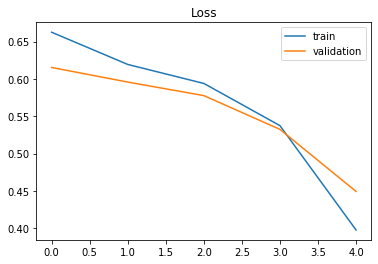

In [101]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show();

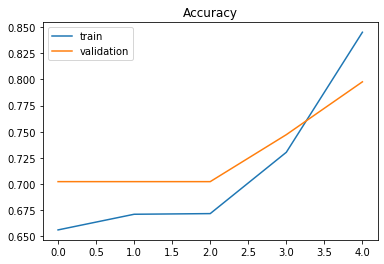

In [102]:
plt.title('Accuracy')
accuracy = history.history.get('accuracy') or history.history.get('acc')
val_accuracy = history.history.get('val_accuracy') or history.history.get('val_acc')
plt.plot(accuracy, label='train')
plt.plot(val_accuracy, label='validation')
plt.legend()
plt.show();

In [103]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

print('Classification report for train dataset:')
prediction = model.predict(X_train)
prediction = np.array([round(x) for x in prediction.reshape(-1).tolist()])
label = y_train
print(classification_report(prediction, label))

print('Classification report for test dataset:')
prediction = model.predict(X_test)
prediction = np.array([round(x) for x in prediction.reshape(-1).tolist()])
label = y_test
print(classification_report(prediction, label))

Classification report for train dataset:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       502
           1       0.97      0.91      0.94      1278

    accuracy                           0.92      1780
   macro avg       0.89      0.92      0.90      1780
weighted avg       0.92      0.92      0.92      1780

Classification report for test dataset:
              precision    recall  f1-score   support

           0       0.43      0.85      0.57        33
           1       0.96      0.76      0.85       152

    accuracy                           0.77       185
   macro avg       0.69      0.80      0.71       185
weighted avg       0.86      0.77      0.80       185



# Predict

In [104]:
# from tensorflow.keras.models import load_model

# model = load_model('checkpoints/my_lstm_model_val-acc-75.7.h5')

def binary_to_sentiment(y):
    return 'negative' if y == 0 else 'positive'

for i in range(10):
    prediction = model.predict(X_test[i].reshape(-1, X_test[i].shape[0]))
    prediction = np.array([round(x) for x in prediction[0].tolist()])[0]
    label = y_test[i]
    result = prediction == label
    
    print(i)
    print(tokenizer_test.sequences_to_texts(X_test[i].reshape(-1, X_test[i].shape[0])))
    print(f'Prediction: {binary_to_sentiment(prediction)}')
    print(f'Label: {binary_to_sentiment(label)}')
    print(result)

0
['batagor bumbu kacangnya enak halus harga nya mahal standar cocok porsi batagor isi seharga']
Prediction: positive
Label: negative
False
1
['terkenal bandung kalo cobain so so aja pesen batagor campur mie kocok roti ronde dll nggak spesial sih']
Prediction: positive
Label: negative
False
2
['kopinya enak enak enak sih sayang aja porsi nya deh hhehe asik kumpul temen sih']
Prediction: positive
Label: positive
True
3
['makanannya enak porsi nasi liwet orang dewasa ditambah gurame goreng ayam bakar sambal banget minuman coba jus segar manis rumah makan menyediakan makan kursi meja makan makan ala lesehan kolam ikan rumah makan suasana menyenangkan']
Prediction: positive
Label: positive
True
4
['bandung kopo mampir makan kuahnya seger dagingnya empuk lauknya lumayan lengkap tehnya gratis soto andalannya orang kopo']
Prediction: positive
Label: positive
True
5
['masakan jepang asli cm harga mahal enak chicken katsu nya crispy tdk asin sushi nya gurih segar bikin ketagihan nasi dicoba isi